# Fraudulent Detection Using DecisionTreeClassifier

### Importing the  and Linear Algebra and Data processing library and dataset


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('F:\\Dataset\\Internship\\Fraud.csv')

In [2]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.type.unique() #Determining Different types of Transactions

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
#Basic Exploratory Data Analysis

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [25]:
df[df['isFraud']==1].shape # Number of rows Detected as Fraud Transaction 

(8213, 11)

In [16]:
df.shape

(6362620, 11)

## Defining a new dataset containing only 'TRANSFER' AND 'CASH_OUT' categories to determine the number of fraud transactions present in other categories 

In [160]:
X = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])] #Seperating two transaction categories

In [161]:
X.shape

(2770409, 11)

In [162]:
X[X['isFraud']==1].shape # Determing the number of Fraud transactions present in only 'TRANSFER' and 'CASH_OUT' categories

(8213, 11)

## All the Fraud transactions are present in our 2 categories only so we move ahead with these categories only while dropping the other categories

<AxesSubplot:xlabel='type', ylabel='count'>

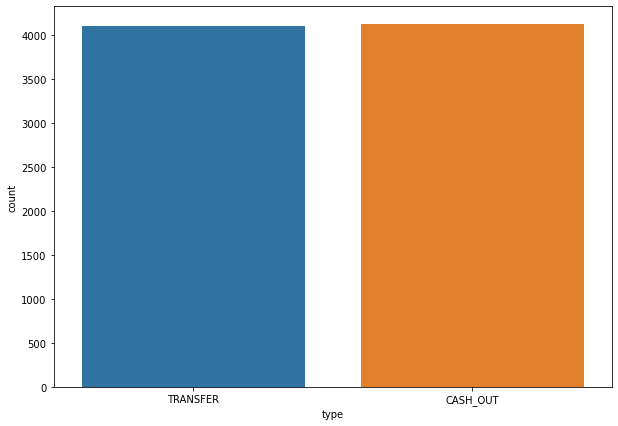

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,7))
sns.countplot(data = X, x = X['type'][X['isFraud']==1])


### In the above plot it is evident that there is no data imbalance among the two given feature

In [164]:
X[X['isFlaggedFraud']==1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


### isFlaggedFraud is just feature in which any business model flags any kind of suspected transaction which is not required for training the Algorithm as we want to train our algorithm independently to predict on the basis of the information which will be available while or during the Transaction


In [165]:
X['nameDest'].nunique()

509565

### With the help of heatmap we will determine which feature has more correlation with 'isFraud' feature and other features as well

<AxesSubplot:>

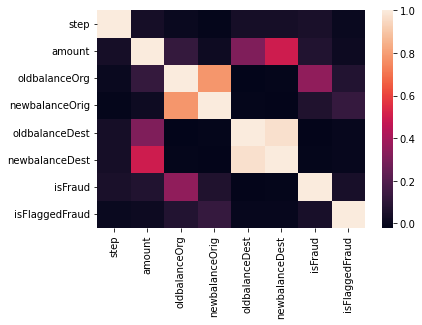

In [166]:
sns.heatmap(X.corr())

In [167]:
X.corr()['isFraud']

step              0.048671
amount            0.070660
oldbalanceOrg     0.347582
newbalanceOrig    0.063557
oldbalanceDest   -0.014960
newbalanceDest   -0.008978
isFraud           1.000000
isFlaggedFraud    0.044072
Name: isFraud, dtype: float64

### As it is clearly visible that the feature 'isFlaggedFraud' and 'step' have very least correlation with 'isFraud' feature and also step is the time of transactions which won't lead onto any insights so we will go ahead and drop those feature

In [168]:
y = X.isFraud
X = X.drop('isFraud', axis = 1)

In [169]:
X = X.drop(['isFlaggedFraud', 'step'], axis =1 )


## Encoding

In [170]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
labl_en = LabelEncoder()
Onehot_en = OneHotEncoder()

In [171]:
X['nameOrig'] = labl_en.fit_transform(X['nameOrig'])
X['nameDest'] = labl_en.fit_transform(X['nameDest'])

In [172]:
X['type'] = labl_en.fit_transform(X['type'])

# Model Creation and fitting

In [173]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()

In [149]:
def train(model):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    print(classification_report(test_y, pred), accuracy_score(test_y, pred))

In [174]:
train(dec_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.88      0.87      0.87      1646

    accuracy                           1.00    554082
   macro avg       0.94      0.93      0.94    554082
weighted avg       1.00      1.00      1.00    554082
 0.9992618421100126


In [175]:
dec_ent_clf = DecisionTreeClassifier(criterion = 'entropy')

In [176]:
train(dec_ent_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.87      0.89      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.93      0.94    554082
weighted avg       1.00      1.00      1.00    554082
 0.9993304240166618


In [179]:
dec3_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2)

In [188]:
train(dec4_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.88      0.89      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.94      0.94    554082
weighted avg       1.00      1.00      1.00    554082
 0.999355691034901
